In [1]:
# we are importing libraries and modules
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Subset
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
import time

# random state is set so that it will give same random values whenever it is run
torch.manual_seed(42)
np.random.seed(42)

#Cuda is a software developed by Nvidia to use GPU
# why Nvidia GPU ? Pytorch used Cuda which can work only on Nvidia GPU
#gives pytorch version
print(f"✅ PyTorch version: {torch.__version__}")

# checks if Nvidia GPU is available in the laptop
print(f"✅ GPU available: {torch.cuda.is_available()}")

# if present, get the GPU model details
if torch.cuda.is_available():
    print(f"   Device: {torch.cuda.get_device_name(0)}")

print("\n🎉 You're all set! Let's dive in!")

✅ PyTorch version: 2.9.0+cpu
✅ GPU available: False

🎉 You're all set! Let's dive in!





Why Tensors Matter

Neural network cannot understand image, video, text or sound. it can understand only numbers. So all data must be converted into numerical form called tensors.

A number (like temperature): scalar (0D)
A list (like daily temperatures): vector (1D)
A spreadsheet (like temperature across cities): matrix (2D)
A video (frames × height × width × color): 4D tensor


Why Tensor why not numpy ?


*   Tensor uses GPU , so faster computation
*   Compute gradient automaticalltical - which is used to learn weights for the model


*   Every part of a neural network takes tensors as input and produces tensors as output






**Scalar**

Scalar as a single measurement: temperature, price, score, etc.

In [4]:
# create scalar tensor
favorite_number = torch.tensor(7.0)

# shape tells the size along each axis
# dimension tells how many axes the tensor has
print(f"Value: {favorite_number}")
print(f"Shape: {favorite_number.shape}")
print(f"Dimensions: {favorite_number.dim()}")
print(f"Data type: {favorite_number.dtype}")

Value: 7.0
Shape: torch.Size([])
Dimensions: 0
Data type: torch.float32


**Vector**

Vectors - Sequences of Numbers

In [3]:
# create 1D tensor (vector)
my_day = torch.tensor([7.0, 5.0, 1.0, 3.0, 8.0])

print(f"My day: {my_day}")
print(f"Shape: {my_day.shape}")
print(f"Total hours: {my_day.sum().item()}")
print(f"Dimension: {my_day.dim()}")

# find average of 1D tensor
average_time = my_day.mean()
print(f"Average time per activity: {average_time}")

My day: tensor([7., 5., 1., 3., 8.])
Shape: torch.Size([5])
Total hours: 24.0
Dimension: 1
Average time per activity: 4.800000190734863


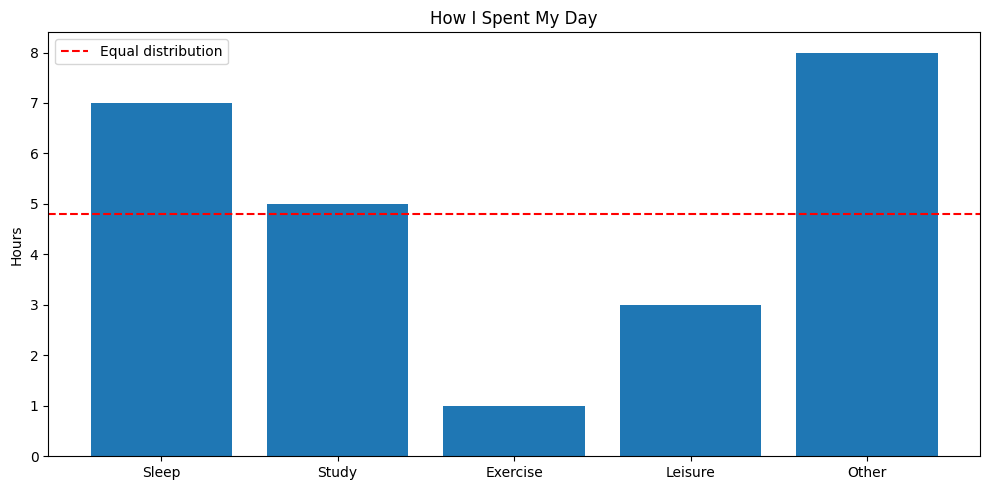

In [5]:

# 📊 Let's visualize your day!
activities = ['Sleep', 'Study', 'Exercise', 'Leisure', 'Other']

# Adjust the labels so they match the number of elements in the tensor
activities = activities[:len(my_day)]
plt.figure(figsize=(10, 5))

# Convert tensor to numpy array because matplotlib cannot plot tensors directly
plt.bar(activities, my_day.numpy())
plt.ylabel('Hours')
plt.title('How I Spent My Day')

# Draw a red horizontal line showing equal time distribution (average hours per activity)
plt.axhline(y=24/len(my_day), color='r', linestyle='--', label='Equal distribution')
plt.legend()
plt.tight_layout()
plt.show()

**Matrix**

Matrices - Tables of Data

In [6]:
# Create matrix: rows = students, columns = assignments
# Random values between 60 and 100 in a 4x5 matrix
grades = torch.randint(60, 101, (4, 5)).float()

print("Grade Matrix:")
print(grades)
print(f"\nShape: {grades.shape}")

# Calculate each student's average
# dim=1 → average across columns (each row → one value per student)
student_averages = grades.mean(dim=1)

# Calculate each assignment's average grade
# dim=0 → average across rows (each column → one value per assignment)
assignment_averages = grades.mean(dim=0)

print(f"\nStudent averages: {student_averages}")
print(f"Assignment averages: {assignment_averages}")

Grade Matrix:
tensor([[ 60.,  68.,  94.,  68.,  82.],
        [ 71.,  71.,  87.,  71.,  69.],
        [ 65.,  92.,  64., 100.,  69.],
        [ 87.,  72., 100.,  72.,  69.]])

Shape: torch.Size([4, 5])

Student averages: tensor([74.4000, 73.8000, 78.0000, 80.0000])
Assignment averages: tensor([70.7500, 75.7500, 86.2500, 77.7500, 72.2500])


In [8]:

# Let's create a simple 3×4 matrix
matrix = torch.tensor([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12]
], dtype=torch.float32)

print("Original matrix:")
print(matrix)
print(f"Shape: {matrix.shape}\n")

# dim → reduces axis
 # keepdim=True → keeps axis but size becomes 1
print("Mean along dim=0 (average down rows → one value per column):")
print(matrix.mean(dim=0))
print(f"Shape: {matrix.mean(dim=0).shape}\n")

print("Mean along dim=1 (average across columns → one value per row):")
print(matrix.mean(dim=1))
print(f"Shape: {matrix.mean(dim=1).shape}")

Original matrix:
tensor([[ 1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.]])
Shape: torch.Size([3, 4])

Mean along dim=0 (average down rows → one value per column):
tensor([5., 6., 7., 8.])
Shape: torch.Size([4])

Mean along dim=1 (average across columns → one value per row):
tensor([ 2.5000,  6.5000, 10.5000])
Shape: torch.Size([3])


**Higher-Dimensional Tensors - The Real World**

In deep learning, you'll often work with 4D tensors, especially for images:

Shape: (Batch, Channels, Height, Width)

For example, 32 RGB images of size 224×224:

* Batch: 32 (number of images)
* Channels: 3 (Red, Green, Blue)
* Height: 224 pixels
* Width: 224 pixels

In [10]:

# Create 4D tensor with zero as value with shape (8, 1, 28, 28)
# This represents 8 grayscale MNIST-like images
image_batch = torch.zeros(8, 1, 28, 28)

print(f"Batch shape: {image_batch.shape}")
print(f"Number of images: {image_batch.shape[0]}")
print(f"Channels per image: {image_batch.shape[1]}")
print(f"Image dimensions: {image_batch.shape[2]} × {image_batch.shape[3]}")

# numel() returns total number of elements in the tensor
# For image tensors, elements correspond to pixel values
total_pixels = image_batch.numel()
print(f"\nTotal pixels in batch: {total_pixels}")

Batch shape: torch.Size([8, 1, 28, 28])
Number of images: 8
Channels per image: 1
Image dimensions: 28 × 28

Total pixels in batch: 6272


# Tensor Operations

In [ ]:

# take two 1 D tensor and do some operation on it
a = torch.tensor([1.0, 2.0, 3.0])
b = torch.tensor([4.0, 5.0, 6.0])

print("Vector a:", a)
print("Vector b:", b)
print("\nOperations:")
# element wise addition
print(f"Addition (a + b): {a + b}")
# element-wise multiplication
print(f"Element-wise multiplication (a * b): {a * b}")
print(f"Dot product (a @ b): {a @ b}")
print(f"Sum of a: {a.sum()}")
print(f"Mean of a: {a.mean()}")
print(f"Max of a: {a.max()}")

# Matrix Multiplication

In [11]:
# Create weight matrix (3 neurons, each having 4 weights)
W = torch.randn(3, 4)

# Create input feature vector (4 input features for one sample)
x = torch.randn(4, 1)

print("Weight matrix W shape:", W.shape)
print("Input vector x shape:", x.shape)

# Perform matrix multiplication
output = W @ x

print(f"\nOutput shape: {output.shape}")



Weight matrix W shape: torch.Size([3, 4])
Input vector x shape: torch.Size([4, 1])

Output shape: torch.Size([3, 1])


# Reshaping: Changing Perspectives
Neural networks often need to reshape data.

In [12]:
# Create a simple image: 1×28×28 (1 channel, 28×28 pixels)
image = torch.randn(1, 28, 28)
print(f"Original image shape: {image.shape}")
print(f"Total elements: {image.numel()}")

# Flatten to a vector - rearranging all the pixel as vector
flattened = image.view(-1)  # -1 means collapse all axes
print(f"\nFlattened shape: {flattened.shape}")

# Alternative flattening
flattened2 = image.reshape(1, -1)  # keep first axis, flatten remaining
print(f"Flattened (keep batch) shape: {flattened2.shape}")

# Reconstruct
reconstructed = flattened.view(1, 28, 28)
print(f"\nReconstructed shape: {reconstructed.shape}")
print(f"Same as original? {torch.equal(image, reconstructed)}")

Original image shape: torch.Size([1, 28, 28])
Total elements: 784

Flattened shape: torch.Size([784])
Flattened (keep batch) shape: torch.Size([1, 784])

Reconstructed shape: torch.Size([1, 28, 28])
Same as original? True


In [13]:
# You have a batch of 32 RGB images, each 64×64 pixels
# Shape: (32, 3, 64, 64)

batch = torch.randn(32, 3, 64, 64)
print(f"Original batch shape: {batch.shape}")

# Flatten each image while keeping the batch dimension
flattened_batch = batch.view(32, -1)

print(f"Flattened batch shape: {flattened_batch.shape}")

# 🔵 Verify: Does the number of elements match?
print(f"\nOriginal elements: {batch.numel()}")
print(f"Flattened elements: {flattened_batch.numel()}")
print(f"Match? {batch.numel() == flattened_batch.numel()}")

Original batch shape: torch.Size([32, 3, 64, 64])
Flattened batch shape: torch.Size([32, 12288])

Original elements: 393216
Flattened elements: 393216
Match? True


# Autograd - The Magic of Automatic Differentiation

Autograd automatically calculates gradients (derivatives)

### 🧪 Experiment 1: Simple Gradient

Let's start with a simple function: $f(x) = x^2$

We know the derivative is: $\frac{df}{dx} = 2x$

Let's see PyTorch compute it automatically!

In [14]:
# Create a tensor and tell PyTorch to track operations on it
# PyTorch will record all operations involving x to compute gradients later
x = torch.tensor(3.0, requires_grad=True)
print(f"x = {x}")
print(f"Tracking gradients? {x.requires_grad}")

# Define function: f(x) = x^2
y = x ** 2
print(f"\ny = x^2 = {y}")

# Compute gradient — find how sensitive y is with respect to x (dy/dx)
# This computes dy/dx and stores it in x.grad
y.backward()


# Instead of checking exact equality (floating point may have tiny errors),
# we check if the difference is very small (tolerance)
print(f"\nGradient dy/dx = {x.grad}")
print(f"Expected (2*x) = {2 * x.item()}")
print(f"Match? {abs(x.grad.item() - 2*x.item()) < 1e-6}")

x = 3.0
Tracking gradients? True

y = x^2 = 9.0

Gradient dy/dx = 6.0
Expected (2*x) = 6.0
Match? True


### 🧪 Experiment 2: More Complex Function

Now let's try: $f(x) = 3x^2 + 2x + 1$

Derivative: $\frac{df}{dx} = 6x + 2$

In [ ]:
# Create scalar tensor and track operations on this tensor for gradient computation
x = torch.tensor(2.0, requires_grad=True)

# Define the function
y = 3*x**2 + 2*x + 1

# Compute gradient — measure how sensitive y is with respect to x (dy/dx)
y.backward()

print(f"x = {x.item()}")
print(f"y = {y.item()}")
print(f"\nGradient dy/dx = {x.grad.item()}")
print(f"Expected (6*x + 2) = {6*x.item() + 2}")

### 🎯 Discovering Gradient Descent

Now comes the magic: **using gradients to optimize**!

Imagine you want to find the minimum of $f(x) = (x - 3)^2$

We know the minimum is at $x = 3$, but let's let gradient descent discover it!

In [ ]:
# we are taking some randome value as 10 which is far from 3 and we know that is the answer
x = torch.tensor(10.0, requires_grad=True)
learning_rate = 0.1
num_steps = 50

# Track the journey
x_history = []
y_history = []

for step in range(num_steps):
    # Compute function value
    y = (x - 3) ** 2

    # Store for visualization
    x_history.append(x.item())
    y_history.append(y.item())

    # Compute gradient
    y.backward()

    # Update x using gradient descent: x = x - learning_rate * gradient
    with torch.no_grad():  # Don't track this operation
        x -= learning_rate * x.grad

    # Clear gradient for next iteration
    x.grad.zero_()

    if step % 10 == 0:
        print(f"Step {step}: x = {x.item():.4f}, y = {y.item():.4f}")

print(f"\nFinal x = {x.item():.4f} (target: 3.0)")

In [ ]:
# 📊 Visualize the optimization journey
if len(x_history) > 0:
    plt.figure(figsize=(12, 4))

    # Plot 1: Function and optimization path
    plt.subplot(1, 2, 1)
    x_range = np.linspace(0, 12, 100)
    y_range = (x_range - 3) ** 2
    plt.plot(x_range, y_range, 'b-', linewidth=2, label='f(x) = (x-3)²')
    plt.plot(x_history, y_history, 'ro-', markersize=4, linewidth=1, alpha=0.6, label='Optimization path')
    plt.axvline(x=3, color='g', linestyle='--', label='True minimum')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Gradient Descent in Action')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Plot 2: Convergence
    plt.subplot(1, 2, 2)
    plt.plot(y_history, 'r-', linewidth=2)
    plt.xlabel('Step')
    plt.ylabel('Loss')
    plt.title('Loss Over Time')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()